# Support Vector Regression (SVR)

Rayan Crasta (stea1th9)

We use non linear SVM Kernel

[Theory in Hindi Part 1](https://www.youtube.com/watch?v=owsAQ_fiwIw)

**Problem Statement**

Lets imagine we are an HR and we ant to hire , we found a great fit for the job .
But the question comes what is your salary expectiation 
he demands $160,000 per year in prev company
We are gonna build a plynomial regression to predict his previous salary to know wether its the truth of the bluff:

**Data Set:** Position_Salaries.csv


*   Positions 
*   Level
*   Salary 

We need to check which position this person had according to salary . 

But chance is he has been Regional Manager for Dunder Mifflin for quite a while. Hence his salary shouldnt be 150,000 but it should be between 150,000 to 160,000 i.e position level 6 and 7

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset= pd.read_csv('Position_Salaries (2).csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature Scaling

In previous example of dataprocessing we didnt apply feature scaling on the features because the value of the dependent variable was between 0 and 1 

If values are really big , the algorithm runs slower as hence we need to scale it down. 

[Why do we need to perform feature Scaling](https://www.youtube.com/watch?v=nmBqnKSSKfM)

[Types of Feature Scaling](https://www.youtube.com/watch?v=mnKm3YP56PY)

In [0]:
#convert y into a 2D array because the Standard Scaler Class that performs Standardisation expects a 2D arays as the input
y=y.reshape(len(y),1)  #10rows and 1 column

In [8]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [0]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
scY = StandardScaler()
X = scX.fit_transform(X)
y =scY.fit_transform(y)

In [10]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')  #We use a RBG kernel(Gausian Radial Basis FUnction)
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [14]:
scY.inverse_transform(regressor.predict(scX.transform([[6.5]])))
#we do inverse tranform becuase we want actualy salary and not the featured scale version of it
#also we do scX.tranform becuase the input should be give nin the featured scale form



array([170370.0204065])

## Visualising the SVR results

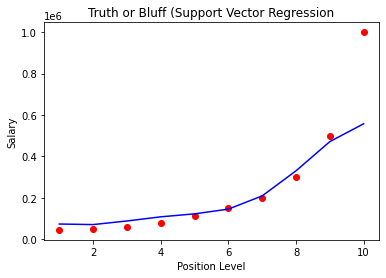

In [17]:
plt.scatter(scX.inverse_transform(X),scY.inverse_transform(y),color='red')
plt.plot(scX.inverse_transform(X),scY.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Truth or Bluff (Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

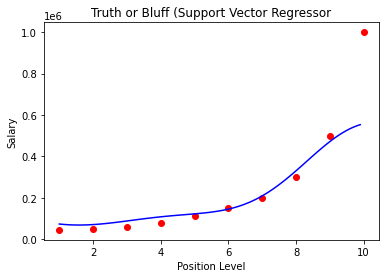

In [26]:
#as we have small Data set ,we will increase x vals plots
X_grid= np.arange(min(scX.inverse_transform(X)),max(scX.inverse_transform(X)),0.1)#create array at differnece of 0.1 cuz small dataset
X_grid= X_grid.reshape((len(X_grid),1))
plt.scatter(scX.inverse_transform(X),scY.inverse_transform(y),color="red")
plt.plot(X_grid,scY.inverse_transform(regressor.predict(scX.transform(X_grid))),color='blue')
plt.title('Truth or Bluff (Support Vector Regressor')
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show()